**Week 2 – Decision Trees** (ISOM 672 - Introduction to Business Analytics)

Decision Trees (DTs) are a supervised learning method that can be used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.


A visual introduction to decision trees: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. 
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.


The disadvantages of decision trees include:
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. [To be continued...]
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem can be mitigated. [To be continued...]
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated. [To be continued...]
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR (i.e. logical operation that outputs true only when inputs differ (one is true, the other is false).).
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree. [To be continued...]

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Numpy is the fundamental package for scientific computing with Python. 
# SciPy (pronounced "Sigh Pie") is an open source Python library used for scientific computing and technical computing. 
# Os module provides a portable way of using operating system dependent functionality.
import numpy as np # np is an alias pointing to numpy
import scipy as sp # sp is an alias pointing to scipy
import os

# Seed the generator to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

# Define path of an image
# Function that takes as input fig_id and returns back the image path
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)


# Save image in a specific path
# Function that takes as input fig_id and saves the image in a specific format (i.e., png, 300 dpi)
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Training and Visualizing a Decision Tree

To understand Decision Trees, let’s just build one and take a look at how it makes predictions.
The following code trains a DecisionTreeClassifier on the iris dataset

The frequency of instances per class is:  {0: 50, 1: 50, 2: 50}
The names of the three distinct classes are:  ['setosa', 'versicolor', 'virginica']
Petal length statistics:  DescribeResult(nobs=150, minmax=(2.0, 4.4000000000000004), mean=3.0540000000000003, variance=0.18800402684563761, skewness=0.330702812773315, kurtosis=0.24144329938318343)
Petal width statistics:  DescribeResult(nobs=150, minmax=(1.0, 6.9000000000000004), mean=3.7586666666666662, variance=3.1131794183445192, skewness=-0.2717119501716388, kurtosis=-1.3953593021397128)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

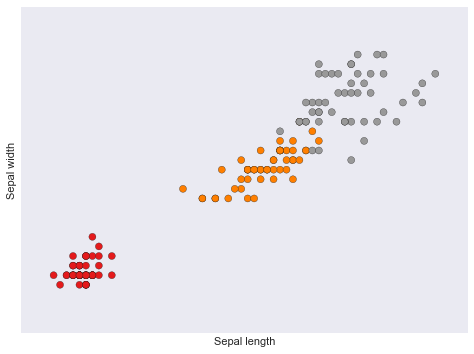

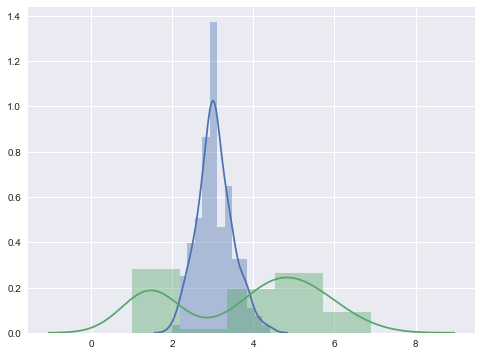

In [2]:
########################################### Imports ###########################################


from sklearn.datasets import load_iris # sklearn is a machine learning library for the Python

# Iris Dataset:
# Learn more about the iris dataset here https://scikit-learn.org/stable/datasets/index.html#iris-dataset
# 3 class outcome: Iris-Setosa, Iris-Versicolour, and Iris-Virginica
# A decision tree classifier is imported from sklearn.tree
# 4 numeric attribuets: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm

from sklearn.tree import DecisionTreeClassifier # The sklearn.tree module includes decision tree-based models for 
# classification and regression
# Documentation for decision Tree Classifier 
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seaborn is a Python data visualization library based on matplotlib. 
# Seaborn documentation can be found here https://seaborn.pydata.org/generated/seaborn.set.html
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

######################################### Data Exploration #########################################

#Load Iris Dataset. Learn more about the dataset here https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = load_iris()
# Retrieving Attributes
X = iris.data[:, 2:] # keep specific attributs (i.e., third column and beyond); keep petal length and width
# Retriving Target Variable
y = iris.target
# Exploring Target Variable
unique, counts = np.unique(y, return_counts=True) # 3 distinct classes equally represented
print("The frequency of instances per class is: " , dict(zip(unique, counts)))
print("The names of the three distinct classes are: ", list(iris.target_names)) 
#print(iris.data[1:5,:])

######################################### Visualizations #########################################

# Visual inspection of dataset
# Plot the training points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # Estimate x axis limits based on dataset
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # Estimate y axis limits based on dataset

plt.figure(2, figsize=(8, 6)) # Set dimensions of new figure and figure id https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
plt.clf() # Clear the current figure

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k') # c, cmap, and edgecolor are parameters for color
                           # see scatter documentation here https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.xlabel('Sepal length') # x label name
plt.ylabel('Sepal width')  # y label name

plt.xlim(x_min, x_max) # Set x axis limits
plt.ylim(y_min, y_max) # Set y axis limits
plt.xticks(()) # Get the current tick locations and labels of the x-axis
plt.yticks(()) # Get the current tick locations and labels of the y-axis

# Drawing a histogram of attributes and fitting a kernel density estmator
plt.figure(3, figsize=(8, 6))
sns.distplot(iris.data[:,1]) # histogram plot 1
sns.distplot(iris.data[:,2]) # histogram plot 2
print("Petal length statistics: ", sp.stats.describe(iris.data[:,1])) # sp.stats.describe cmputes several descriptive statistics of the passed array
print("Petal width statistics: ", sp.stats.describe(iris.data[:,2]))

######################################### Model Training #########################################


# The following code trains a DecisionTreeClassifier on the iris dataset
# Decision Tree Induction (Fitting the Model)
# Documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # Be aware of default parameters
tree_clf.fit(X, y)


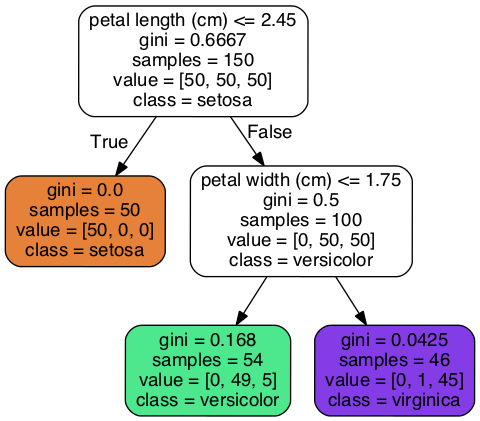

In [3]:
######################################### Imports #########################################

from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image

# ATTENTION: You need to change the working directory
# For instance, I had to change it to:
# os.chdir("/Users/vtodri/Dropbox/Vilma/Teaching/Emory/Fall/MSBA/Lectures/Week 2")

# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

################################# Visualization of Decision Tree ##########################


export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Then you can convert this .dot file to a variety of formats such as PDF or PNG using
# the dot command-line tool from the graphviz package.

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng iris_tree.dot -o iris_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

#print(os.getcwd())
path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "iris_tree.png")
Image(path_png)



Lets see how the tree represented the previous figure makes predictions. Suppose you find
an iris flower and you want to classify it. You start at the root node (depth 0, at the
top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is,
then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf
node (i.e., it does not have any children nodes), so it does not ask any questions: you
can simply look at the predicted class for that node and the Decision Tree predicts
that your flower is an Iris-Setosa (class=setosa).

Now suppose you find another flower, but this time the petal length is greater than
2.45 cm. You must move down to the root’s right child node (depth 1, right), which is
not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If
it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely
an Iris-Virginica (depth 2, right).

A node’s samples attribute counts how many training instances it applies to. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1,
right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A
node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-
Versicolor, and 45 Iris-Virginica. Finally, a node’s gini attribute measures its impurity:
a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0.

Note: Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two children.

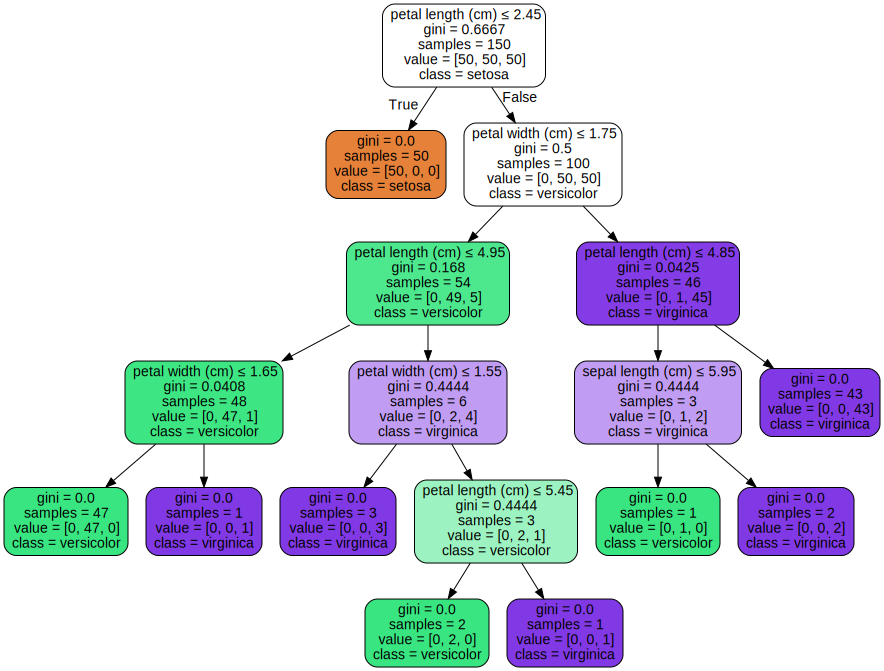

In [4]:
import graphviz #If you get an error "ImportError: No module named graphviz", run in command line "pip install graphviz"
from sklearn import tree

# The following code trains a DecisionTreeClassifier on the iris dataset (all attributes are being used now)
# Decision Tree Induction (Fitting the Model)
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

# Model Evaluation

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.94  0.06]
 [ 0.    0.    1.  ]]


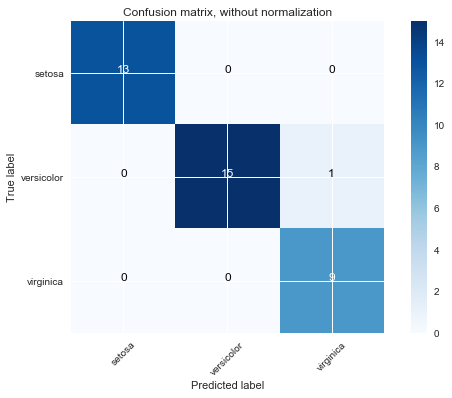

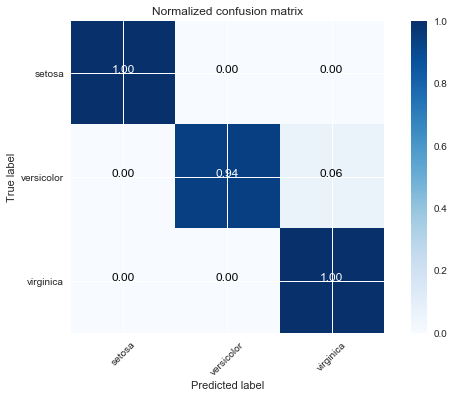

In [5]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

############################# Build Model & Apply it to the Test Set #######################

#Build the decision tree
clf3 = tree.DecisionTreeClassifier()
# "clf3.fit(X_train, y_train)"" fits the model and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

###################################### Confusion Matrix #####################################


# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
                    

# Predicting the Classes 

In [6]:
tree_clf.predict([[5, 1.5]]) # Make predictions based on fitted model

array([1])

# Estimating the Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular
class k. [To be continued...]

# The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm
first splits the training set in two subsets using a single feature $k$ and a threshold
$t_k$ (e.g., “petal length ≤ 2.45 cm”). How does it choose $k$ and $t_k$? It searches for the
pair ($k$, $t_k$) that produces the purest subsets (weighted by their size). The cost function
that the algorithm tries to minimize is given by the following equation:

$$ J(k,t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}, $$ 

\begin{equation}
  where \begin{cases}
    G_{\text{ left / right}} \text{ measures the impurity of the left/right subset}, \\
    m_{\text{ left / right}} \text{ is the number of instances in the left/right subset}. \\
  \end{cases}
\end{equation}


Once it has successfully split the training set in two, it splits the subsets using the
same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches
the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity. A few other hyperparameters (described in a moment) control additional stopping conditions (e.g., min_samples_split, min_samples_leaf, etc).


The CART algorithm is a greedy algorithm: it greedily
searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.

Unfortunately, finding the optimal tree is known to be an NP-Complete problem: it
requires O(exp(m)) time, making the problem intractable even for fairly small training
sets. This is why we must settle for a “reasonably good” solution.

Note: P is the set of problems that can be solved in polynomial time. NP is the set of problems whose solutions can
be verified in polynomial time. An NP-Hard problem is a problem to which any NP problem can be reduced
in polynomial time. An NP-Complete problem is both NP and NP-Hard. A major open mathematical question
is whether or not P = NP. If P ≠ NP (which seems likely), then no polynomial algorithm will ever be
found for any NP-Complete problem.


# Computational Complexity

Making predictions requires traversing the Decision Tree from the root to a leaf.
Decision Trees are generally approximately balanced, so traversing the Decision Tree
requires going through roughly $O(log_2(m))$ nodes. Since each node only requires
checking the value of one feature, the overall prediction complexity is just $O(log_2(m))$,
independent of the number of features. So predictions are very fast, even when dealing
with large training sets.

However, the training algorithm compares all features (or less if max_features is set)
on all samples at each node. This results in a training complexity of O(n × m log(m)).
For small training sets (less than a few thousand instances), Scikit-Learn can speed up
training by presorting the data (set presort=True), but this slows down training considerably
for larger training sets.

# Choosing Information Criterion: Gini Impurity or Entropy?


By default, the Gini impurity measure is used, but you can select the entropy impurity
measure instead by setting the criterion hyperparameter to "entropy". The concept
of entropy originated in thermodynamics as a measure of molecular disorder:
entropy approaches zero when molecules are still and well ordered. It later spread to a
wide variety of domains, including Shannon’s information theory, where it measures the average information content of a message: entropy is zero when all messages are
identical. In Machine Learning, it is frequently used as an impurity measure: a set’s
entropy is zero when it contains instances of only one class.

As previously discussed in the class, the definition of the entropy of the $i_{th}$ node is:

$$ Entropy_i = - \sum_{k=1}^{n} p_{i,k}log(p_{i,k}) $$

So should we use Gini impurity or entropy? The truth is, most of the time it does not
make a big difference: they lead to similar trees. Gini impurity is slightly faster to
compute, so it is a good default. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees.

Saving figure decision_tree_decision_boundaries_plot


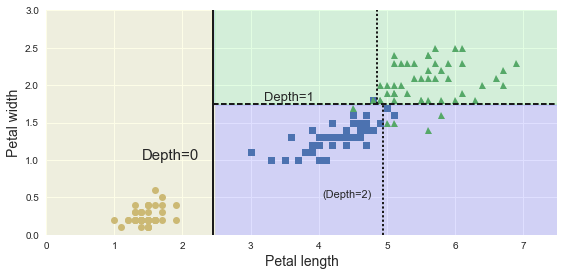

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

The previous figure shows this Decision Tree’s decision boundaries. The thick vertical line represents
the decision boundary of the root node (depth 0): petal length = 2.45 cm.
Since the left area is pure (only Iris-Setosa), it cannot be split any further. However,
the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm
(represented by the dashed line). Since max_depth was set to 2, the Decision Tree
stops right there. However, if you set max_depth to 3, then the two depth-2 nodes
would each add another decision boundary (represented by the dotted lines).

# Regularization Hyperparameters


Decision Trees make very few assumptions about the training data (as opposed to linear models for example). 

If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization.
[To be continued...]

# Sensitivity to training set details

Hopefully by now you are convinced that Decision Trees have a lot going for them:
they are simple to understand and interpret, easy to use, versatile, and powerful.


However they do have a few limitations. First, as you may have noticed, Decision
Trees love orthogonal decision boundaries (all splits are perpendicular to an axis),
which makes them sensitive to training set rotation. For example, Figure "sensitivity to rotation" shows a
simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily
convoluted. Although both Decision Trees fit the training set perfectly, it is very
likely that the model on the right will not generalize well. One way to limit this problem
is to use PCA [To be continued...], which often results in a better orientation of the
training data.

More generally, the main issue with Decision Trees is that they are very sensitive to
small variations in the training data. For example, if you just remove the widest Iris-
Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
and train a new Decision Tree, you may get the model represented in the following Figure. As
you can see, it looks very different from the previous Decision Tree.
Actually, since the training algorithm used by Scikit-Learn is stochastic (i.e., it randomly selects the set of features to evaluate at each node.) you may
get very different models even on the same training data (unless you set the
random_state hyperparameter).

In [7]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[ 4.8,  1.8]])

In [8]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=40, splitter='best')

Saving figure decision_tree_instability_plot


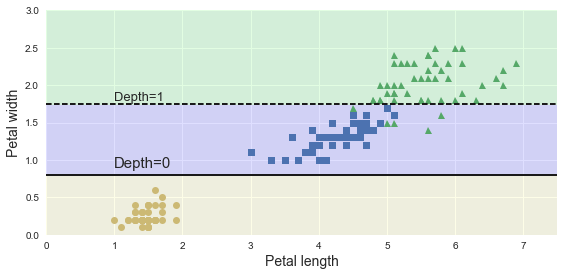

In [10]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure sensitivity_to_rotation_plot


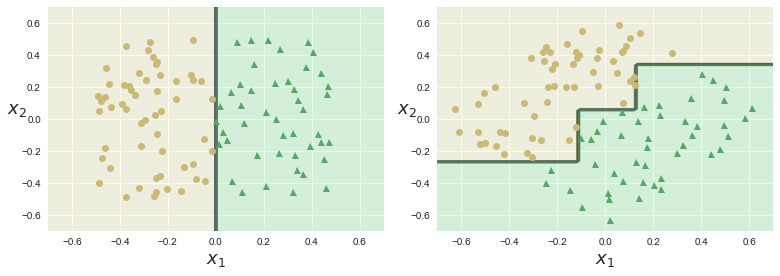

In [9]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()